No handles with labels found to put in legend.


Plotting from: 
['./outputs/plot_data_2023.csv', './outputs/plot_data_3023.csv']
./graphs/plot__2023__3023


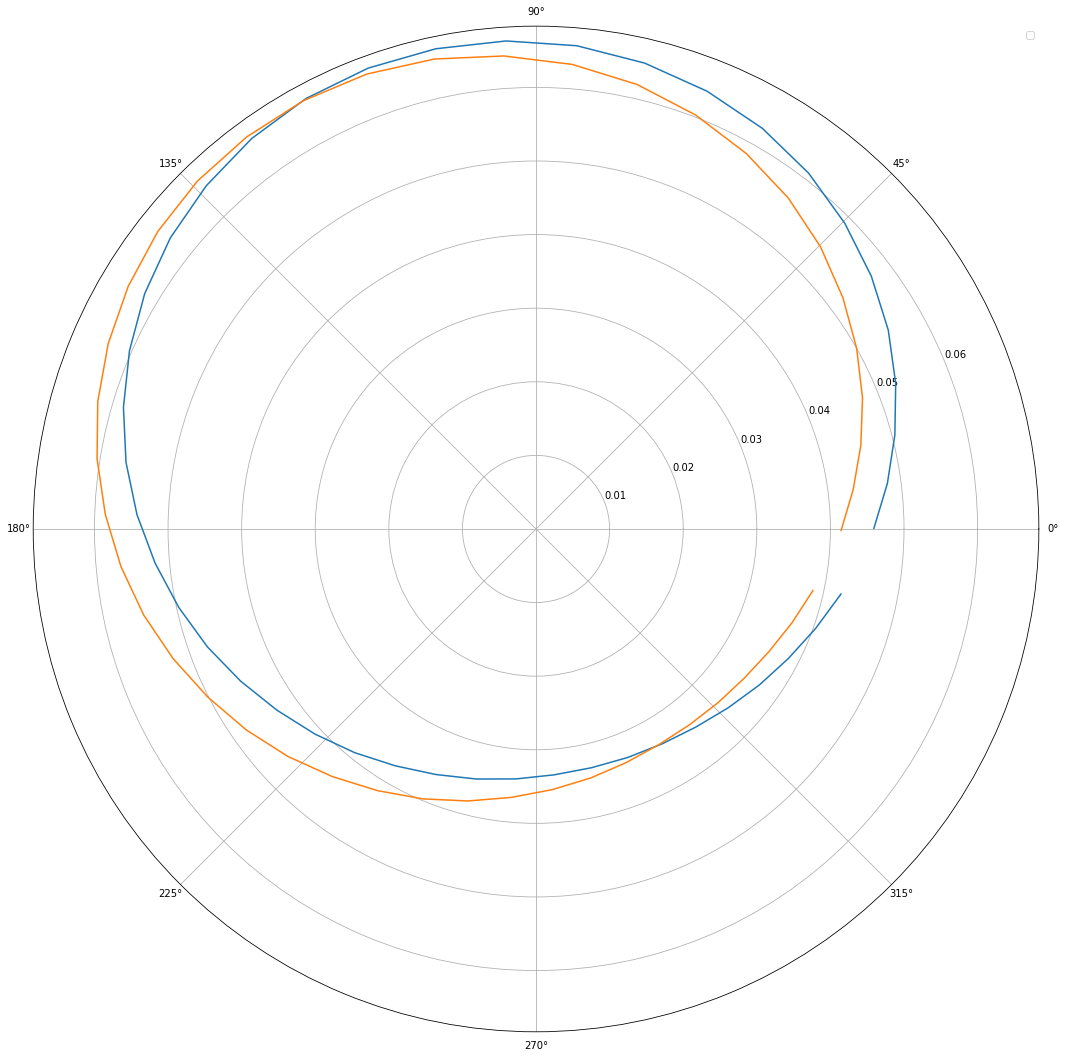

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from date_list_generator import m
from PIL import Image

def fig2img(fig):
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

d2r = np.pi/180
r0 = 0.95

with open("./outputs/plot_list.txt") as file:
    lines = [line.rstrip() for line in file]

print("Plotting from: ")
print(lines)

plt.figure(figsize=(10,10))

plotfilename = "./graphs/plot"

for line in lines:
    plot_data = pd.read_csv(line)

    thetas = plot_data['theta']
    rs = plot_data['r']
    # print(line[-8:-4])
    plt.polar(thetas*d2r, rs-r0, label="%sAD"%line[-9:-4])
    plotfilename = plotfilename + '_' + line[-9:-4]

print(plotfilename)
plt.legend()

fig = plt.gcf()
fig.set_size_inches(18.5, 18.5)
img = fig2img(fig)
img.save('%s.png'%plotfilename)
plt.show()